In [1]:
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')

        
def make_plots_across_share(data_type, eval_method, hammer_style, zero_style):
    xasis = list(range(1, 13))
    share_25 = {"train_con_auc": [], "train_con_accu": [],
                "test_con_auc": [], "test_con_accu": [],
                "train_diff_auc": [], "train_diff_accu": [],
                "test_diff_auc": [], "test_diff_accu": [],
                "train_ratio_auc": [], "train_ratio_accu": [],
                "test_ratio_auc": [], "test_ratio_accu": [],
                "train_log_auc": [], "train_log_accu": [],
                "test_log_auc": [], "test_log_accu": []}
    share_50 = {"train_con_auc": [], "train_con_accu": [],
                "test_con_auc": [], "test_con_accu": [],
                "train_diff_auc": [], "train_diff_accu": [],
                "test_diff_auc": [], "test_diff_accu": [],
                "train_ratio_auc": [], "train_ratio_accu": [],
                "test_ratio_auc": [], "test_ratio_accu": [],
                "train_log_auc": [], "train_log_accu": [],
                "test_log_auc": [], "test_log_accu": []}
    share_75 = {"train_con_auc": [], "train_con_accu": [],
                "test_con_auc": [], "test_con_accu": [],
                "train_diff_auc": [], "train_diff_accu": [],
                "test_diff_auc": [], "test_diff_accu": [],
                "train_ratio_auc": [], "train_ratio_accu": [],
                "test_ratio_auc": [], "test_ratio_accu": [],
                "train_log_auc": [], "train_log_accu": [],
                "test_log_auc": [], "test_log_accu": []}
    share_100 = {"train_con_auc": [], "train_con_accu": [],
                "test_con_auc": [], "test_con_accu": [],
                "train_diff_auc": [], "train_diff_accu": [],
                "test_diff_auc": [], "test_diff_accu": [],
                "train_ratio_auc": [], "train_ratio_accu": [],
                "test_ratio_auc": [], "test_ratio_accu": [],
                "train_log_auc": [], "train_log_accu": [],
                "test_log_auc": [], "test_log_accu": []}
    file_25 = "../evals/{}_{}_25_{}.pkl".format(hammer_style, zero_style, data_type)
    file_50 = "../evals/{}_{}_50_{}.pkl".format(hammer_style, zero_style, data_type)
    file_75 = "../evals/{}_{}_75_{}.pkl".format(hammer_style, zero_style, data_type)
    file_100 = "../evals/{}_{}_100_{}.pkl".format(hammer_style, zero_style, data_type)
    with open(file_25, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            share_25[key].extend(res_dict[key])
    with open(file_50, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            share_50[key].extend(res_dict[key])
    with open(file_75, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            share_75[key].extend(res_dict[key])
    with open(file_100, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            share_100[key].extend(res_dict[key])
    fig = plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(xasis, share_25["train_diff_"+eval_method], label="25%")
    plt.plot(xasis, share_50["train_diff_"+eval_method], label="50%")
    plt.plot(xasis, share_75["train_diff_"+eval_method], label="75%")
    plt.plot(xasis, share_100["train_diff_"+eval_method], label="100%")
    plt.title("c-d model on training set on {} dataset with {} zeroing method".format(data_type, zero_style))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, share_25["train_diff_"+eval_method])
    mark_values(xasis, share_50["train_diff_"+eval_method])
    mark_values(xasis, share_75["train_diff_"+eval_method])
    mark_values(xasis, share_100["train_diff_"+eval_method])
    
    plt.subplot(2, 2, 2)
    plt.plot(xasis, share_25["test_diff_"+eval_method], label="25%")
    plt.plot(xasis, share_50["test_diff_"+eval_method], label="50%")
    plt.plot(xasis, share_75["test_diff_"+eval_method], label="75%")
    plt.plot(xasis, share_100["test_diff_"+eval_method], label="100%")
    plt.title("c-d model on test set on {} dataset with {} zeroing method".format(data_type, zero_style))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, share_25["test_diff_"+eval_method])
    mark_values(xasis, share_50["test_diff_"+eval_method])
    mark_values(xasis, share_75["test_diff_"+eval_method])
    mark_values(xasis, share_100["test_diff_"+eval_method])
    
    plt.subplot(2, 2, 3)
    plt.plot(xasis, share_25["train_ratio_"+eval_method], label="25%")
    plt.plot(xasis, share_50["train_ratio_"+eval_method], label="50%")
    plt.plot(xasis, share_75["train_ratio_"+eval_method], label="75%")
    plt.plot(xasis, share_100["train_ratio_"+eval_method], label="100%")
    plt.title("c/d model on train set on {} dataset with {} zeroing method".format(data_type, zero_style))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, share_25["train_ratio_"+eval_method])
    mark_values(xasis, share_50["train_ratio_"+eval_method])
    mark_values(xasis, share_75["train_ratio_"+eval_method])
    mark_values(xasis, share_100["train_ratio_"+eval_method])
    
    plt.subplot(2, 2, 4)
    plt.plot(xasis, share_25["test_ratio_"+eval_method], label="25%")
    plt.plot(xasis, share_50["test_ratio_"+eval_method], label="50%")
    plt.plot(xasis, share_75["test_ratio_"+eval_method], label="75%")
    plt.plot(xasis, share_100["test_ratio_"+eval_method], label="100%")
    plt.title("c/d model on test set on {} dataset with {} zeroing method".format(data_type, zero_style))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, share_25["test_ratio_"+eval_method])
    mark_values(xasis, share_50["test_ratio_"+eval_method])
    mark_values(xasis, share_75["test_ratio_"+eval_method])
    mark_values(xasis, share_100["test_ratio_"+eval_method])
    
    plt.show()

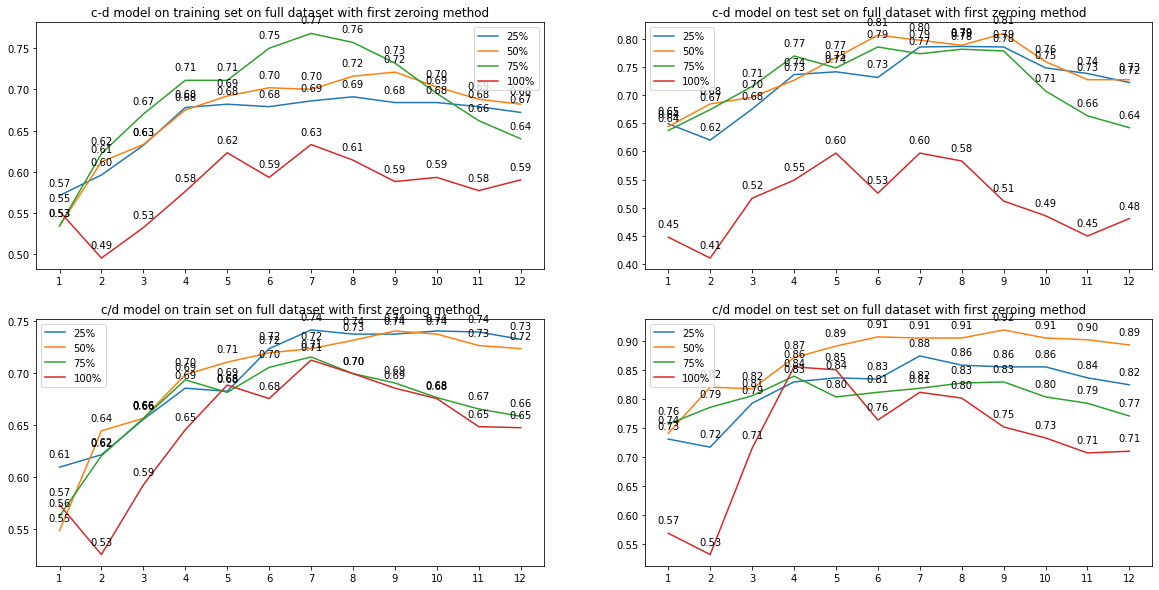

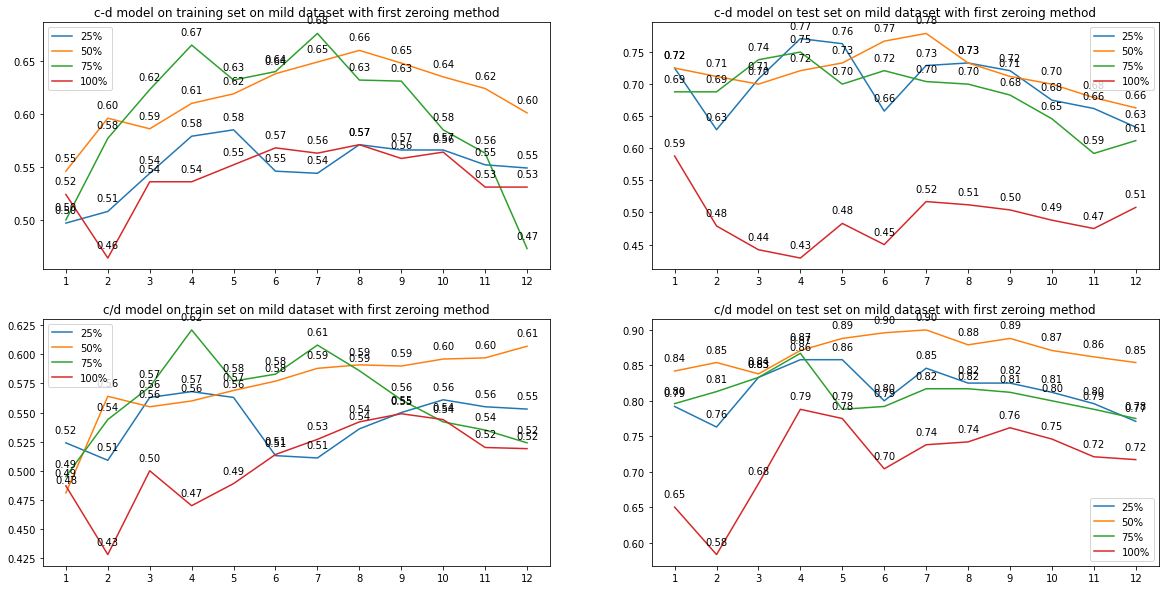

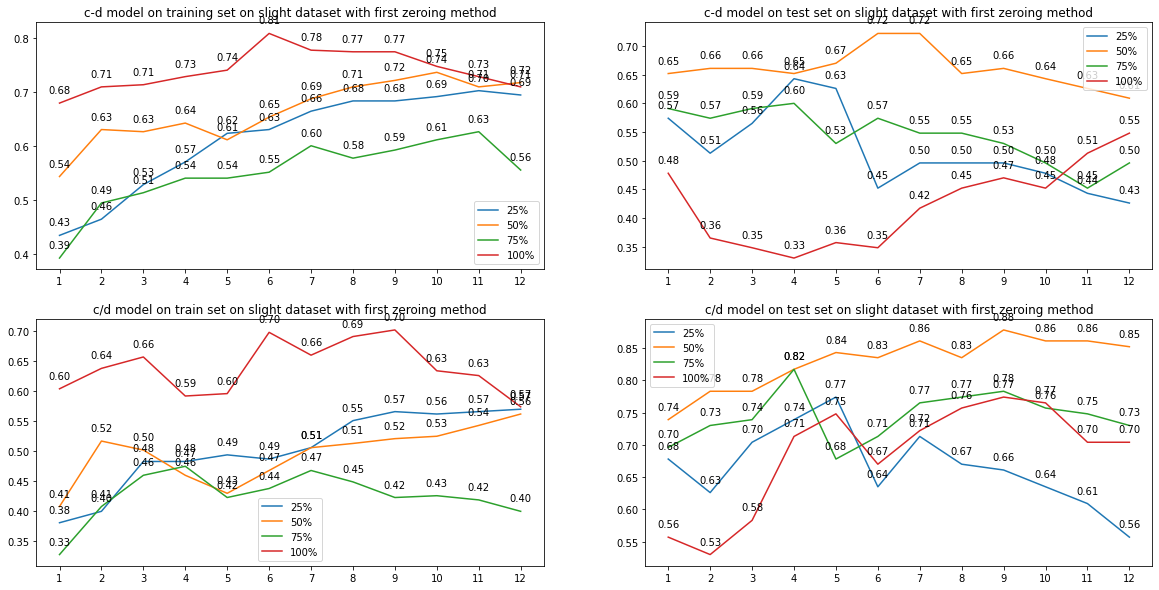

In [3]:
make_plots_across_share("full", "auc", "accumu", "first")
make_plots_across_share("mild", "auc", "accumu", "first")
make_plots_across_share("slight", "auc", "accumu", "first")

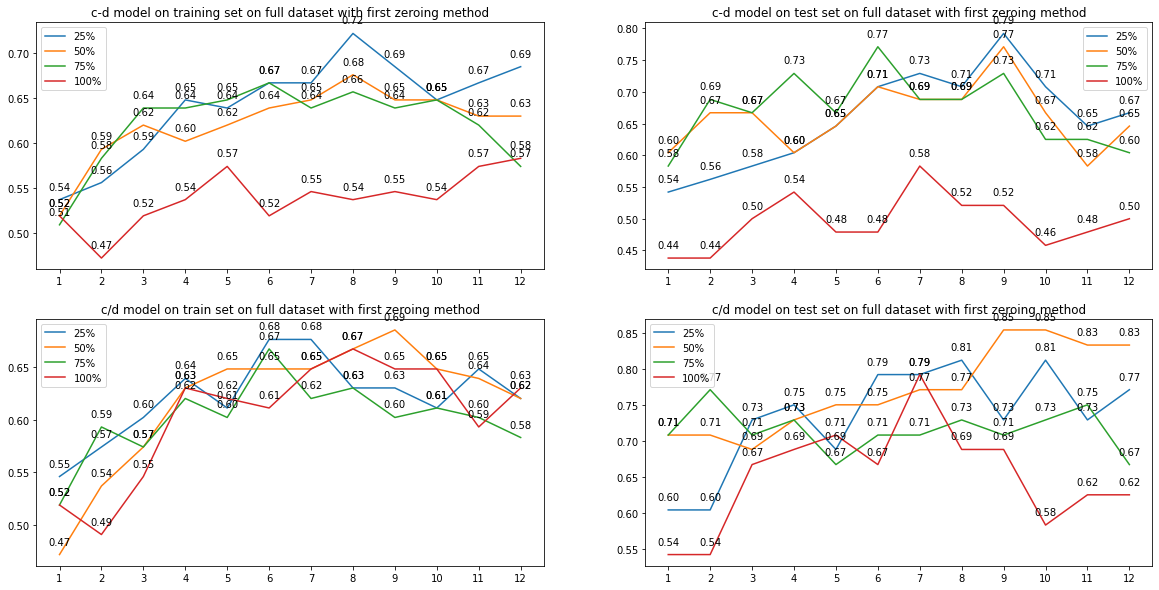

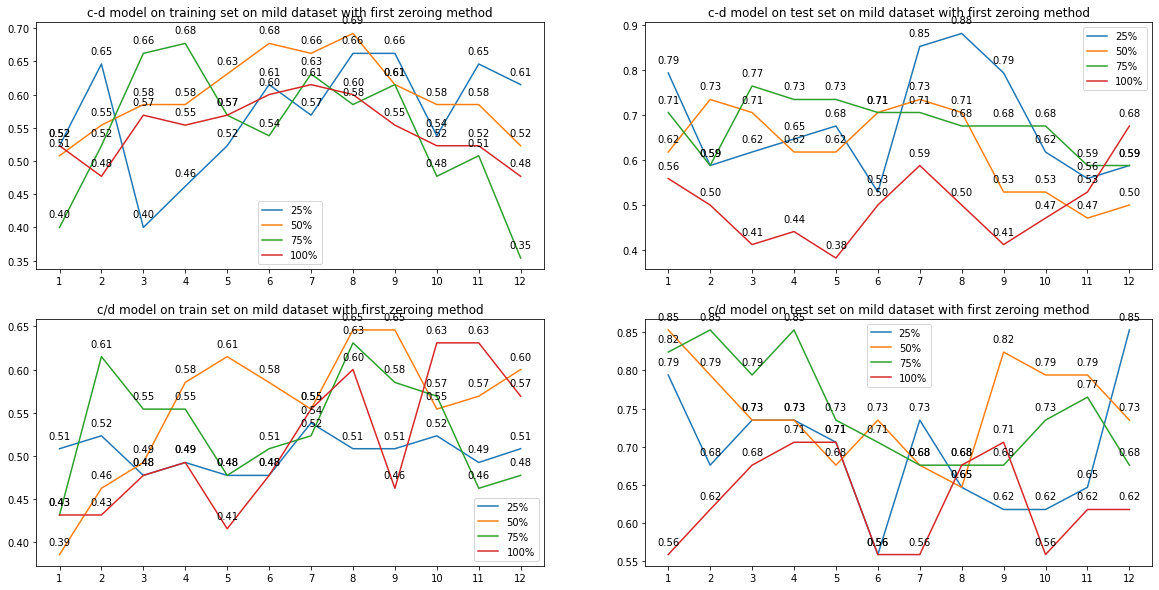

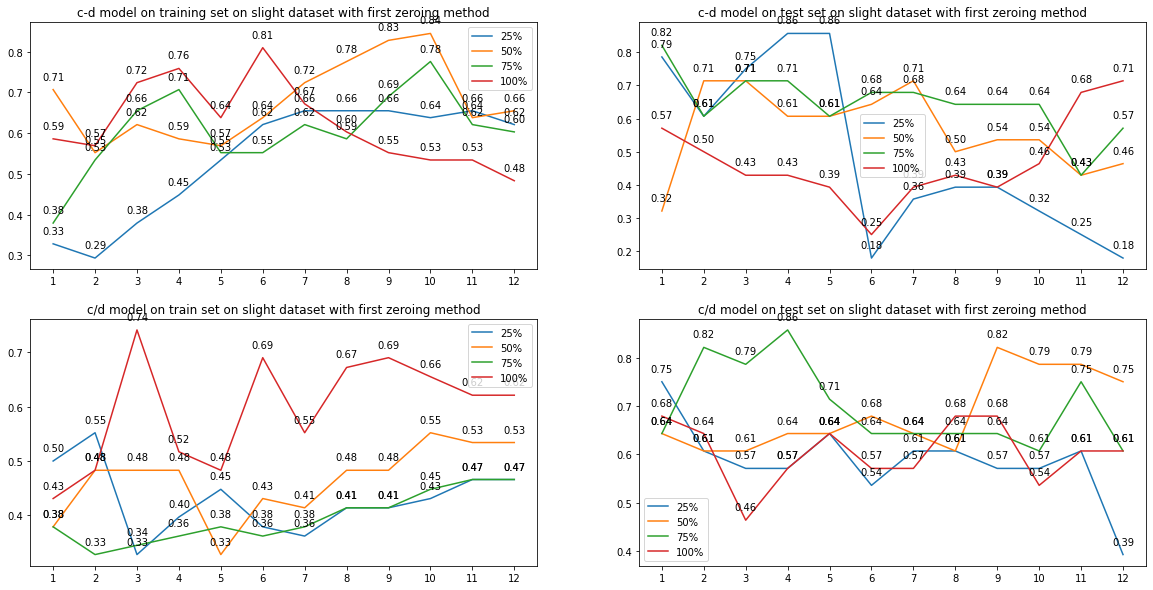

In [4]:
make_plots_across_share("full", "accu", "accumu", "first")
make_plots_across_share("mild", "accu", "accumu", "first")
make_plots_across_share("slight", "accu", "accumu", "first")

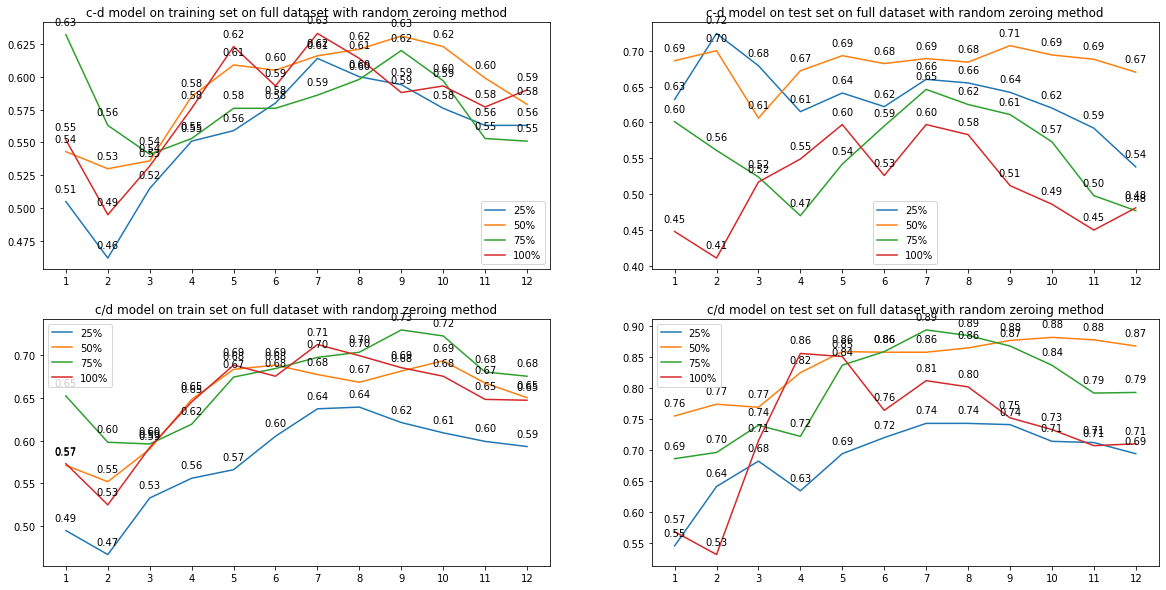

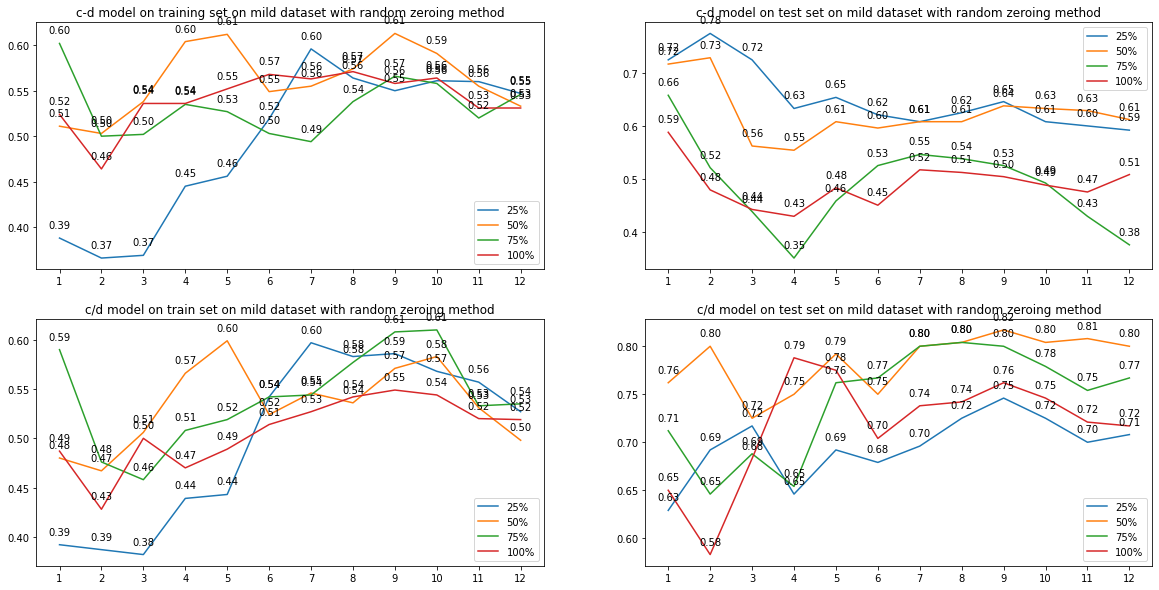

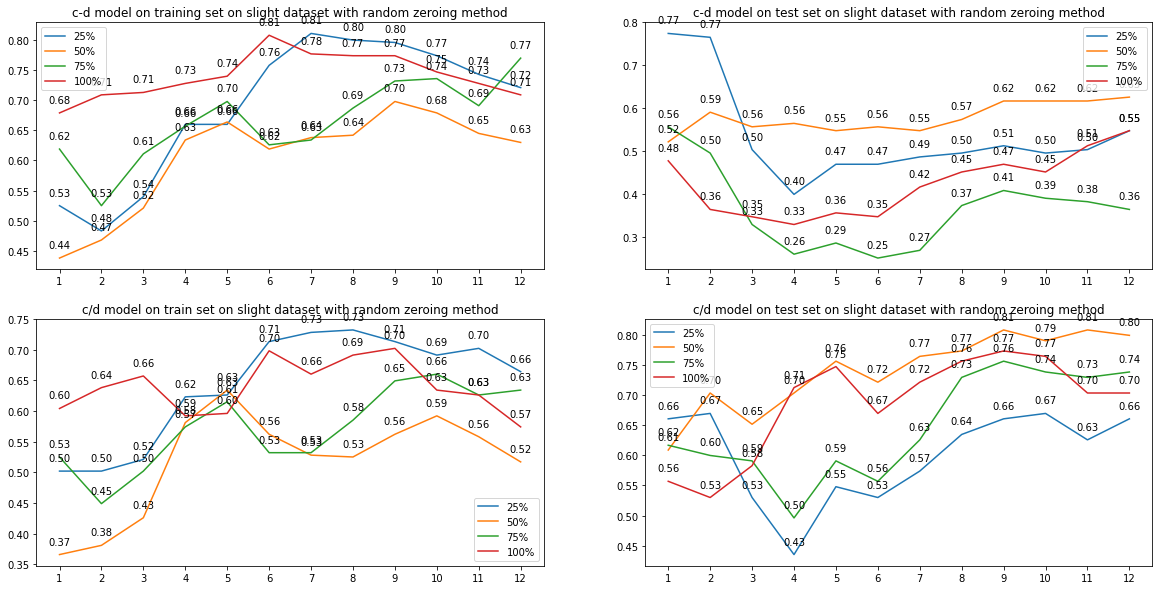

In [5]:
make_plots_across_share("full", "auc", "accumu", "random")
make_plots_across_share("mild", "auc", "accumu", "random")
make_plots_across_share("slight", "auc", "accumu", "random")

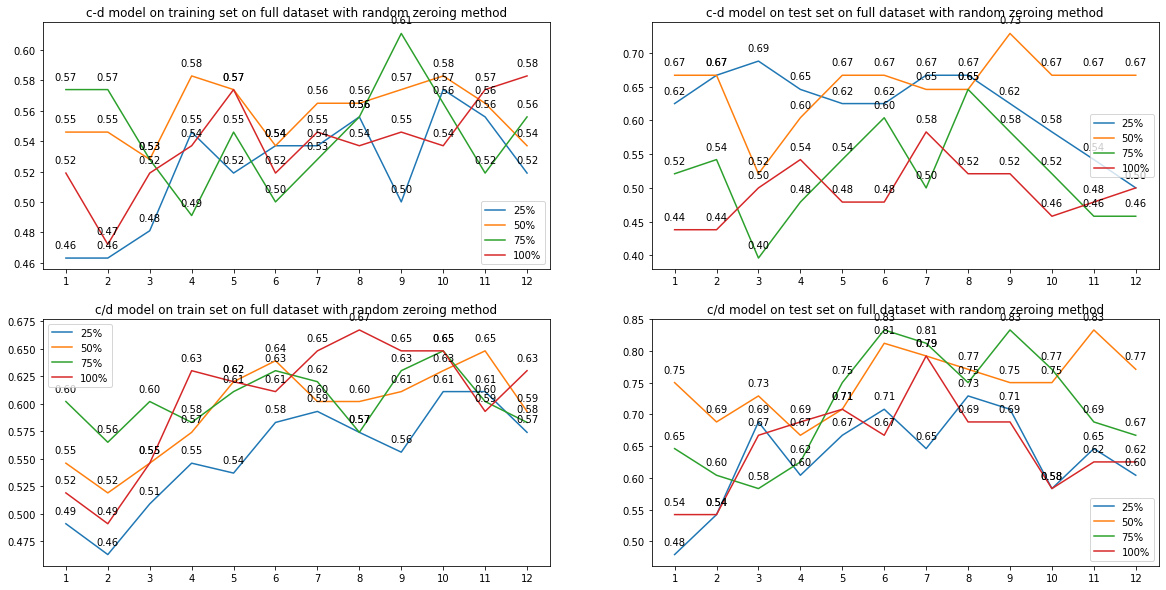

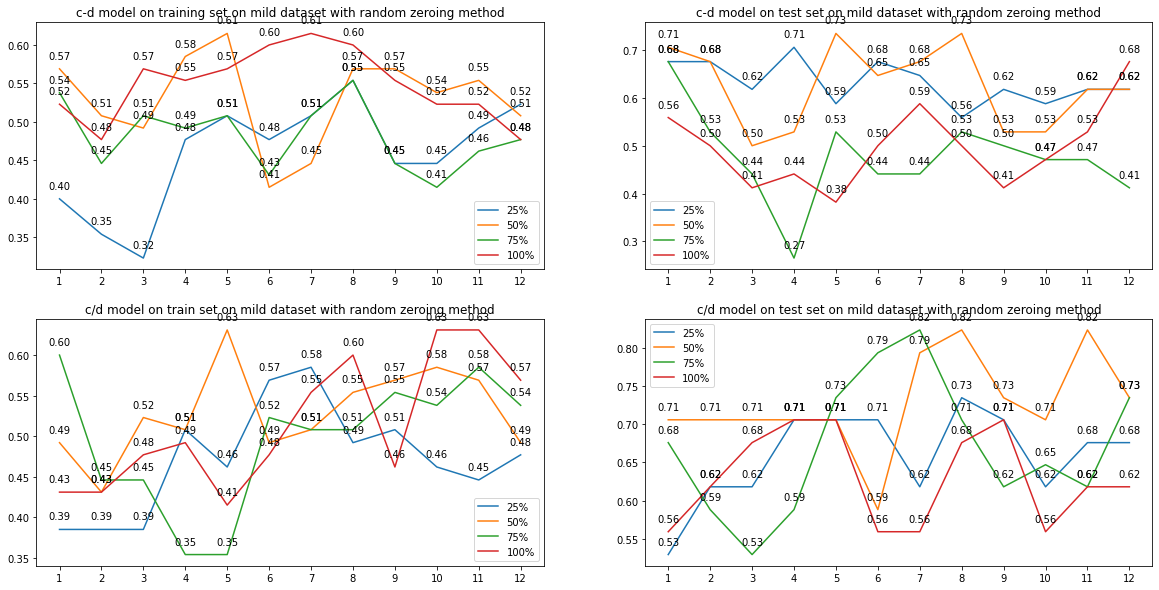

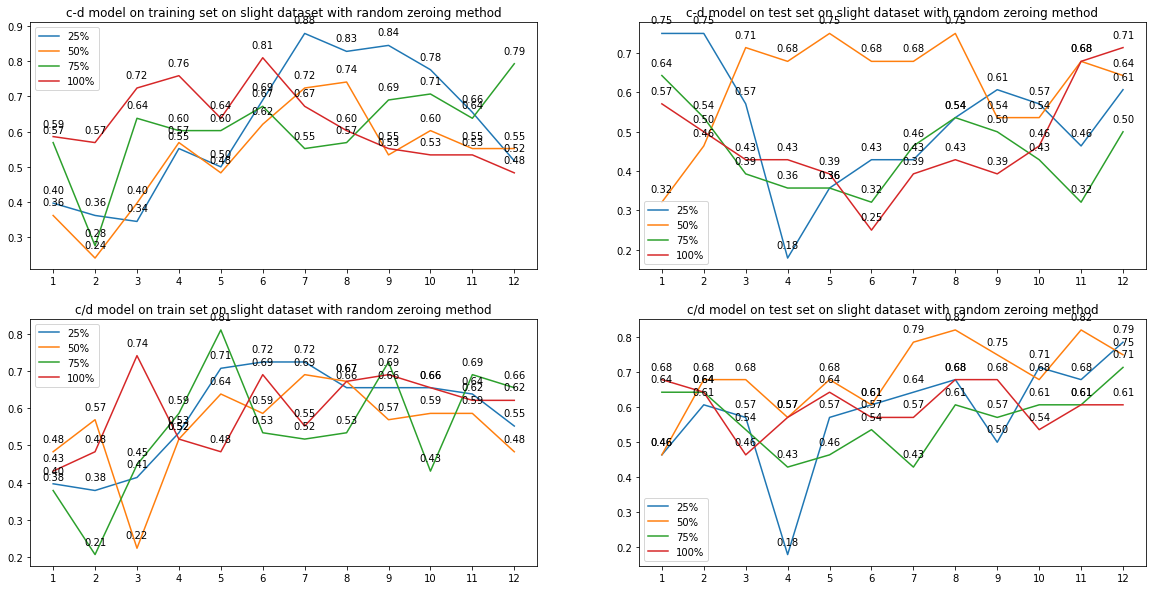

In [6]:
make_plots_across_share("full", "accu", "accumu", "random")
make_plots_across_share("mild", "accu", "accumu", "random")
make_plots_across_share("slight", "accu", "accumu", "random")